In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
from scipy import stats

mpl.rcParams['figure.figsize'] = (18, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
evo_data = pd.read_csv(r'data/demand_datasets/evo_demand.csv', index_col=0)
modo_data = pd.read_csv(r'data/demand_datasets/modo_demand.csv', index_col=0)
c2g_data = pd.read_csv(r'data/demand_datasets/c2g_demand.csv', index_col=0)


evo_data.index = pd.to_datetime(evo_data.index)
modo_data.index = pd.to_datetime(modo_data.index)
c2g_data.index = pd.to_datetime(c2g_data.index)

evo_data = evo_data.travels
modo_data = modo_data.travels
c2g_data = c2g_data.travels

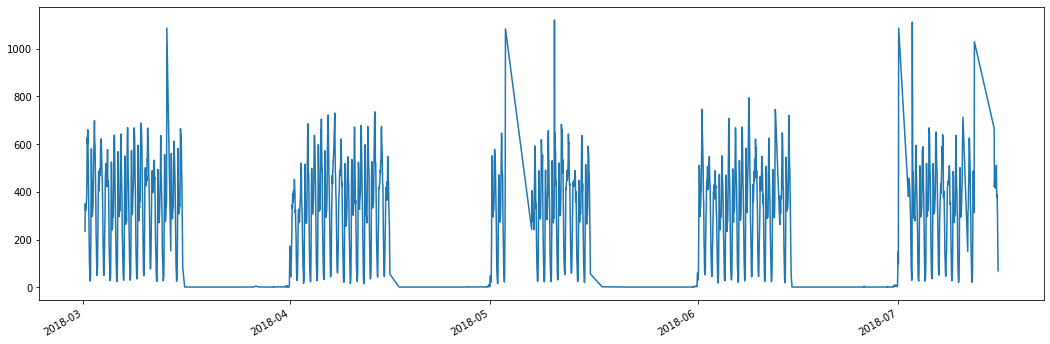

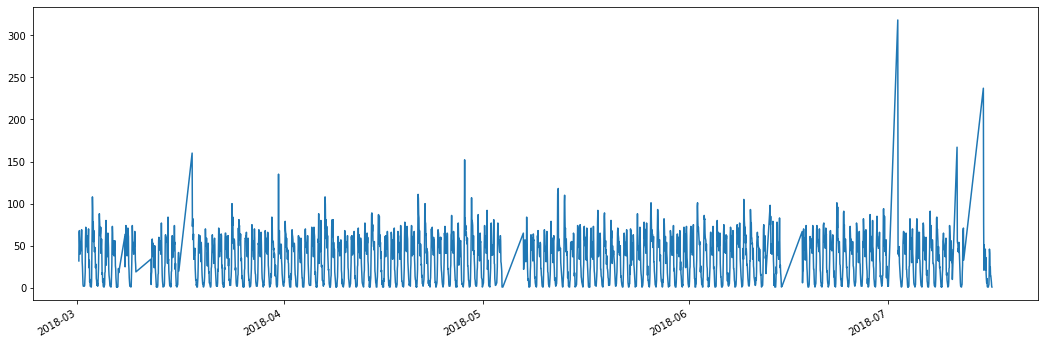

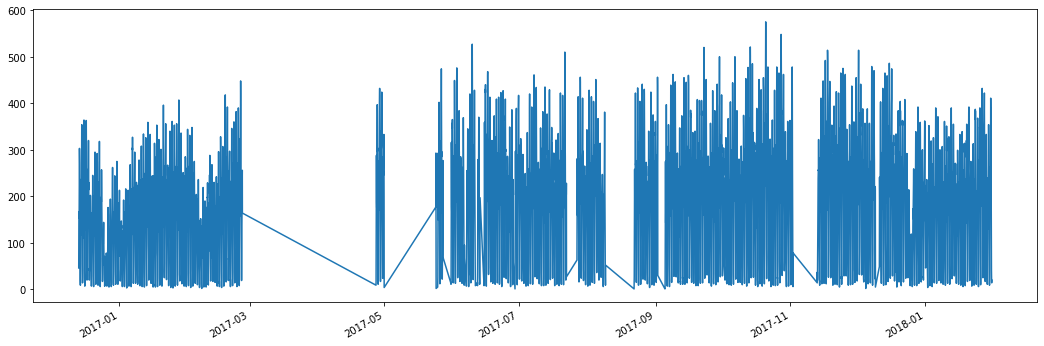

In [3]:
evo_data.plot()
plt.show()
modo_data.plot()
plt.show()
c2g_data.plot()
plt.show()

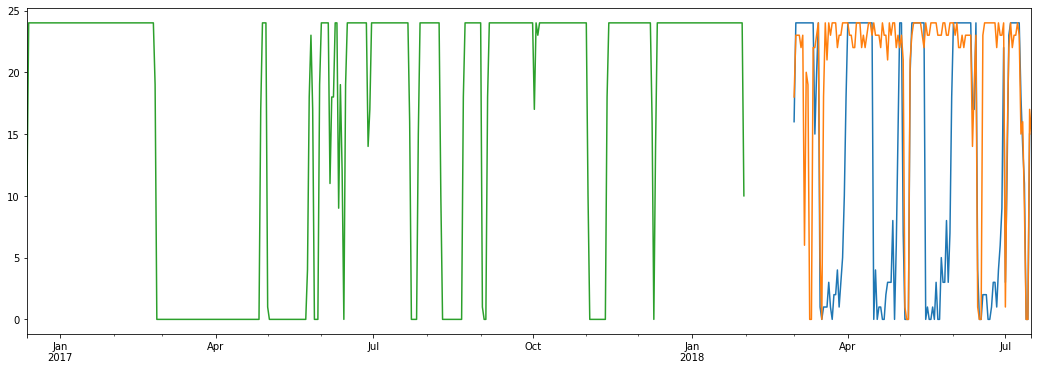

In [4]:
evo_days = evo_data.groupby(pd.Grouper(freq='D')).count()
modo_days = modo_data.groupby(pd.Grouper(freq='D')).count()
c2g_days = c2g_data.groupby(pd.Grouper(freq='D')).count()

evo_days.plot()
modo_days.plot()
c2g_days.plot()

In [5]:
def search_best_sequence(series, threshold):
    valid_series = series >= threshold
    sequences = (~valid_series).cumsum()[valid_series]
    best_days_id = sequences.value_counts().index[0]
    best_days = sequences[sequences == best_days_id].index
    return best_days

In [6]:
threshold = 24
best_evo_days = search_best_sequence(evo_days, threshold)
best_c2g_days = search_best_sequence(c2g_days, threshold)
best_modo_days = search_best_sequence(modo_days, threshold)

print(f"With the threshold of {threshold} hours of data, the best sequences of each dataset are:")
print(f"Modo - Length: {len(best_modo_days)} - Dates: {best_modo_days[0]} - {best_modo_days[-1]}.")
print(f"Car2Go - Length: {len(best_c2g_days)} - Dates: {best_c2g_days[0]} - {best_c2g_days[-1]}.")
print(f"Evo - Length: {len(best_evo_days)} - Dates: {best_evo_days[0]} - {best_evo_days[-1]}.")

With the threshold of 24 hours of data, the best sequences of each dataset are:
Modo - Length: 7 - Dates: 2018-06-19 00:00:00 - 2018-06-25 00:00:00.
Car2Go - Length: 73 - Dates: 2016-12-14 00:00:00 - 2017-02-24 00:00:00.
Evo - Length: 15 - Dates: 2018-04-01 00:00:00 - 2018-04-15 00:00:00.


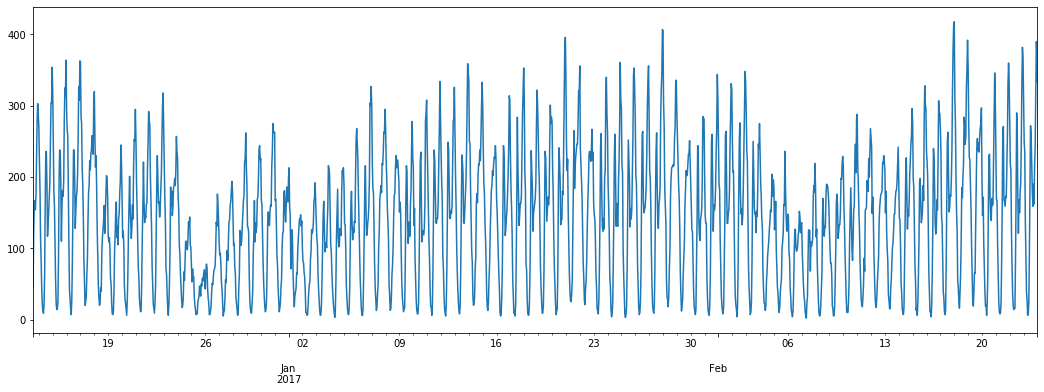

In [29]:
c2g_data.loc[:best_c2g_days[-1]].plot()
plt.show()

### Now we will check next hours arround our frame

In [28]:
delta = dt.timedelta(hours=24)
c2g_data.loc[best_c2g_days[-1] + delta: best_c2g_days[-1] + 2*delta].head(24)

2017-02-25 00:00:00    418
2017-02-25 01:00:00    313
2017-02-25 02:00:00    285
2017-02-25 03:00:00    226
2017-02-25 04:00:00    187
2017-02-25 05:00:00    121
2017-02-25 06:00:00     68
2017-02-25 07:00:00     28
2017-02-25 08:00:00     24
2017-02-25 09:00:00     19
2017-02-25 10:00:00     37
2017-02-25 11:00:00     74
2017-02-25 12:00:00    123
2017-02-25 13:00:00    209
2017-02-25 14:00:00    212
2017-02-25 15:00:00    214
2017-02-25 16:00:00    236
2017-02-25 17:00:00    256
2017-02-25 18:00:00    164
Name: travels, dtype: int64

As we can see with this an the C2G plot above, we can see that the data collection stops abruptly 2017-02-25 18:00:00, so we will use 2017-02-25 17:00:00 as the end of this time range (We are ignoring the last hour as it can have bad data if the data collection stopped earlier in that hour)

In [30]:
c2g_data.loc[best_c2g_days[0] - delta: best_c2g_days[0]].head(24)

2016-12-13 14:00:00     46
2016-12-13 15:00:00    120
2016-12-13 16:00:00    156
2016-12-13 17:00:00    167
2016-12-13 18:00:00    154
2016-12-13 19:00:00    174
2016-12-13 20:00:00    224
2016-12-13 21:00:00    278
2016-12-13 22:00:00    303
2016-12-13 23:00:00    288
2016-12-14 00:00:00    271
Name: travels, dtype: int64

And looking at the time before 2016-12-14 00:00:00, we still have some hours of data left. So the start of our range will be 2016-12-13 15:00:00 (We are ignoring the first hour as it can have bad data if the data collection stated later in that hour)

That leaves us with the range 2016-12-13 15:00:00 to 2017-02-25 17:00:00 to be studied

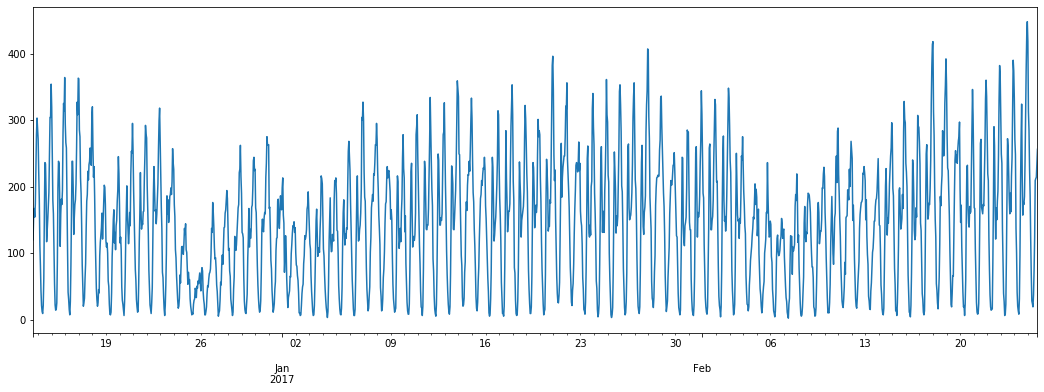

In [34]:
data = c2g_data.loc["2016-12-13 15:00:00":"2017-02-25 17:00:00"]
data.plot()

In [35]:
data.count()

1779